In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Load data
df = pd.read_excel('Nouba 46 sales 2017-2023.xlsx')
df.head()

,Unnamed: 0,Amount
0,2017-10-01,2500.000000
1,2017-11-01,2489.201415
2,2017-12-01,2466.459091
3,2018-01-01,2409.274590
4,2018-02-01,2393.684111


In [4]:
#Change column names
df.columns = ["Months", "Sales"]
df.set_index('Months', inplace= True)
df.head()

,Sales
Months,
2017-10-01,2500.000000
2017-11-01,2489.201415
2017-12-01,2466.459091
2018-01-01,2409.274590
2018-02-01,2393.684111


# VISUALIZE THE DATA

<Axes: xlabel='Months'>

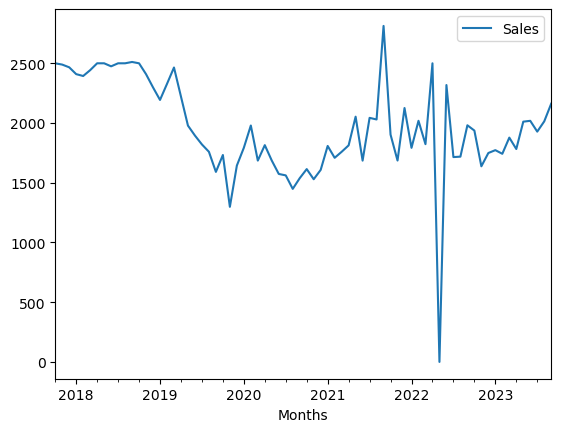

In [5]:
df.plot()

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
test_result = adfuller(df['Sales'])

In [8]:
def adfuller_test(sales):
    results = adfuller(sales)
    labels = ['ADF test statistic', 'p-value', 'No of lags used', 'No of observations used']
    for value, label in zip(results, labels):
        print(label +' : '+ str(value))
    if results[1] <= 0.05:
        print("It is stationary")
    else:
        print("It is not stationary")

In [9]:
adfuller_test(df['Sales'])

ADF test statistic : -2.2734923249939487
p-value : 0.1806597768525937
No of lags used : 2
No of observations used : 69
It is not stationary


# DATA TRANSFORMATION

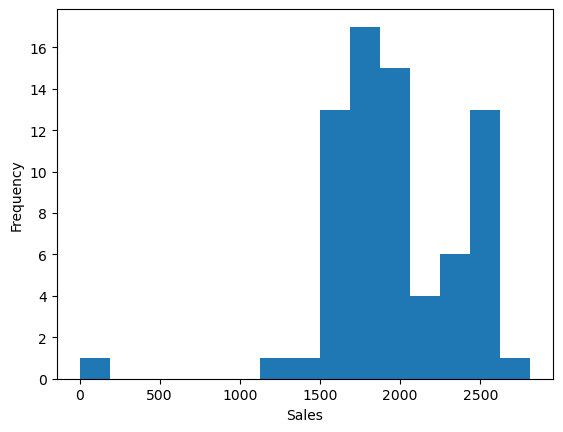

In [13]:
plt.hist(df['Sales'], bins = 15)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [14]:
Sales_trans = df['Sales'].transform([np.sqrt, np.exp, np.log, np. reciprocal])
print(Sales_trans)

                 sqrt  exp       log  reciprocal
Months                                          
2017-10-01  50.000000  inf  7.824046    0.000400
2017-11-01  49.891897  inf  7.819717    0.000402
2017-12-01  49.663458  inf  7.810539    0.000405
2018-01-01  49.084362  inf  7.787081    0.000415
2018-02-01  48.925291  inf  7.780589    0.000418
...               ...  ...       ...         ...
2023-05-01  44.848616  inf  7.606585    0.000497
2023-06-01  44.927186  inf  7.610086    0.000495
2023-07-01  43.909310  inf  7.564253    0.000519
2023-08-01  44.876019  inf  7.607807    0.000497
2023-09-01  46.497746  inf  7.678808    0.000463

[72 rows x 4 columns]


ValueError: supplied range of [1.0, inf] is not finite

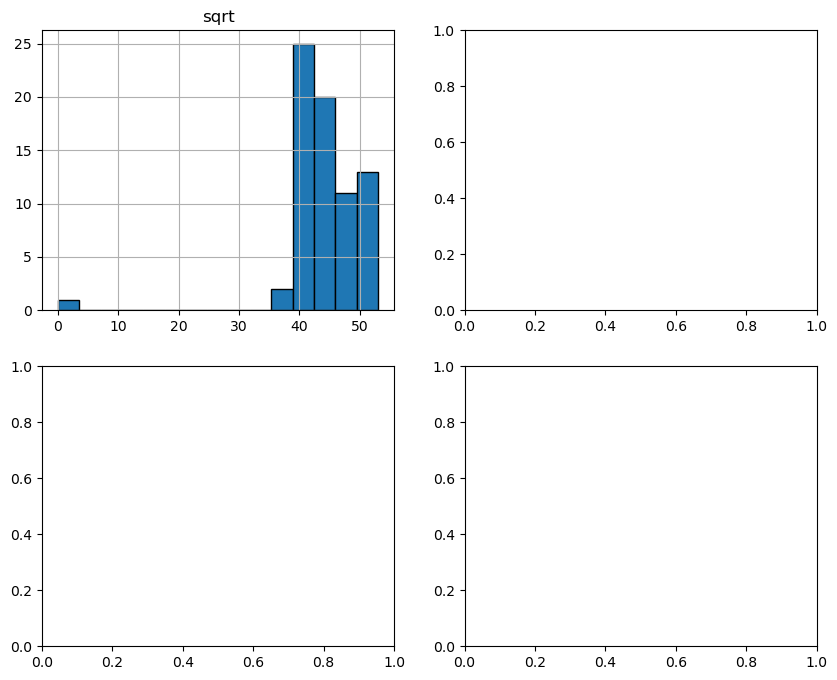

In [19]:
Sales_trans.hist(bins = 15, layout = (2,2), edgecolor = 'black', figsize = (10,8))
plt.show()

In [20]:
Sales_trans.describe()

C:\Users\Vee\anaconda3\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,sqrt,exp,log,reciprocal
count,72.000000,72.0,72.000000,72.000000
mean,43.873271,inf,-inf,inf
std,6.486716,NaN,NaN,NaN
min,0.000000,1.0,-inf,0.000356
25%,41.443673,NaN,7.448670,0.000431
50%,43.766393,NaN,7.557722,0.000522
75%,48.170461,NaN,7.749491,0.000582
max,53.036701,inf,7.941968,inf


In [21]:
df.describe()
#the mean is greater than the median hence the positive skewness

,Sales
count,72.000000
mean,1966.357026
std,416.187232
min,0.000000
25%,1717.578409
50%,1915.517574
75%,2320.395267
max,2812.891638


# CONCLUSION

My data is not enough to work with a simple ARIMA model

The patterns of the data movement are not consistent(No consistent trend that the model can learn)